#### Microdados do Censo da Educação Superior.
#### Comparativo entre os anos de 2020 a 2022 - Concluintes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ces2020=pd.read_csv('../Microdados do Censo da Educação Superior 2020/dados/MICRODADOS_CADASTRO_CURSOS_2020_ALTO_TIETE.csv',
                    sep=';',
                    header=0,
                    encoding='latin-1',
                    low_memory=True,
                    verbose=False
                   )

ces2021=pd.read_csv('../Microdados do Censo da Educação Superior 2021/dados/MICRODADOS_CADASTRO_CURSOS_2021_ALTO_TIETE.csv',
                    sep=';',
                    header=0,
                    encoding='latin-1',
                    low_memory=True,
                    verbose=False
                   )

ces2022=pd.read_csv('../Microdados do Censo da Educação Superior 2022/dados/MICRODADOS_CADASTRO_CURSOS_2022_ALTO_TIETE.csv',
                    sep=';',
                    header=0,
                    encoding='latin-1',
                    low_memory=True,
                    verbose=False
                   )

ces2020GRU=ces2020[(ces2020['NO_MUNICIPIO']=='Guarulhos')]
ces2021GRU=ces2021[(ces2021['NO_MUNICIPIO']=='Guarulhos')]
ces2022GRU=ces2022[(ces2022['NO_MUNICIPIO']=='Guarulhos')]

In [3]:
#### Exibe as Áreas Gerais.
for areaGeral in np.unique(ces2020GRU[['NO_CINE_AREA_GERAL']]):
    print(areaGeral)

Agricultura, silvicultura, pesca e veterinária
Artes e humanidades
Ciências naturais, matemática e estatística
Ciências sociais, comunicação e informação
Computação e Tecnologias da Informação e Comunicação (TIC)
Educação
Engenharia, produção e construção
Negócios, administração e direito
Programas básicos
Saúde e bem-estar
Serviços


In [4]:
areaGeral='Educação'

#### Funções.

In [5]:
def atribuiAno():
    ces2020.insert(0,'ANO_CENSO',2020)
    ces2021.insert(0,'ANO_CENSO',2021)
    ces2022.insert(0,'ANO_CENSO',2022)

def heatMapPlot(dataFrame : pd, **kargs):
    plt.figure(figsize=(12,8))
    plt.title(kargs['titulo'], color='blue', fontdict={'size':16, 'weight':'bold'})
    sns.heatmap(data=dataFrame, cmap=kargs['cmap'], annot=True, fmt=".0f")
    plt.xlabel(kargs['xLabel'], color='black', fontdict={'size':16, 'weight':'bold'})
    plt.ylabel(kargs['yLabel'], color='black', fontdict={'size':16, 'weight':'bold'})
    plt.show()

def filtroDeDados(dataFrame : pd, filtro : str, colunasAgrupadas : list, nomeColunas : list) -> pd.DataFrame:
    # Filtro pela Área Geral.
    dadosFiltrados=dataFrame[(dataFrame['NO_CINE_AREA_GERAL']==filtro)]

    # Agrupamento pela Área Detalhada.
    dadosAgrupados= dadosFiltrados.groupby(by='NO_CINE_ROTULO')[colunasAgrupadas].sum()

    # Atribui o nome das colunas.
    dadosAgrupados.columns=nomeColunas

    return dadosAgrupados

In [6]:
atribuiAno()



Nome CINE Área Geral: Educação

Concluintes por Gênero.



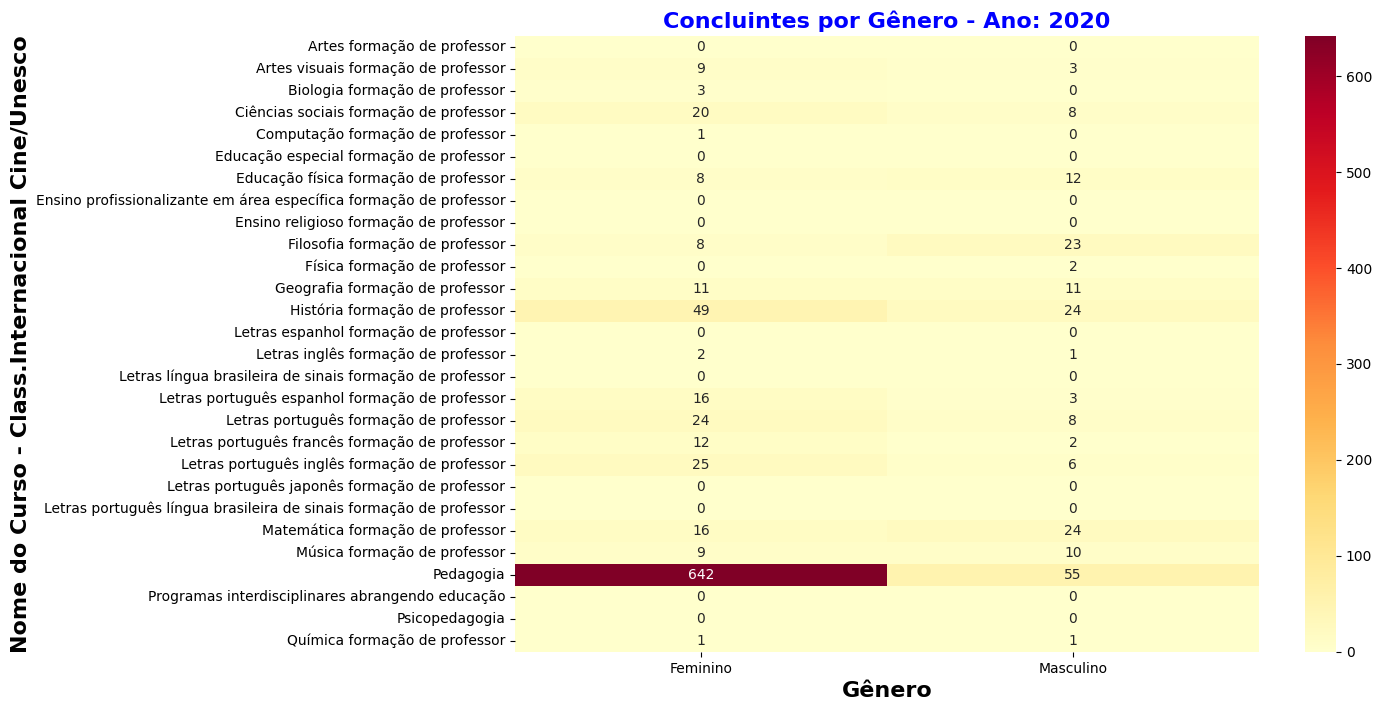

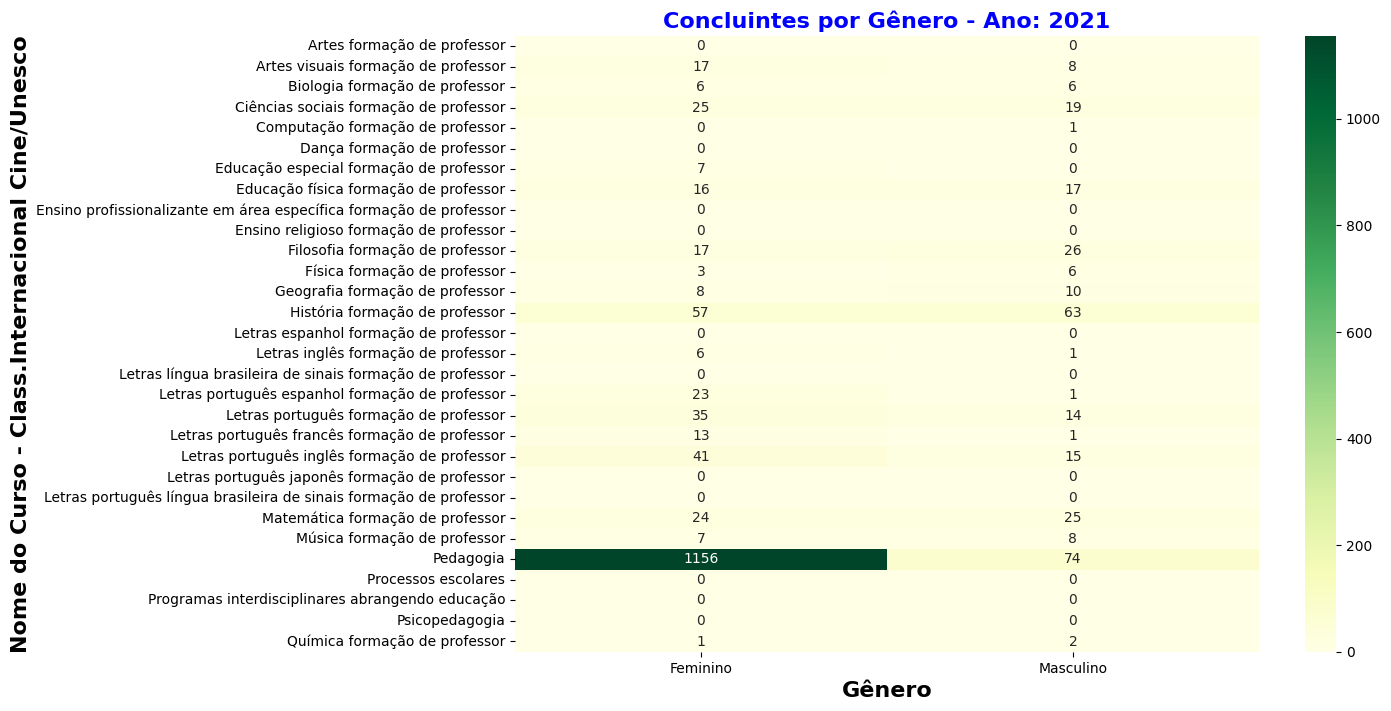

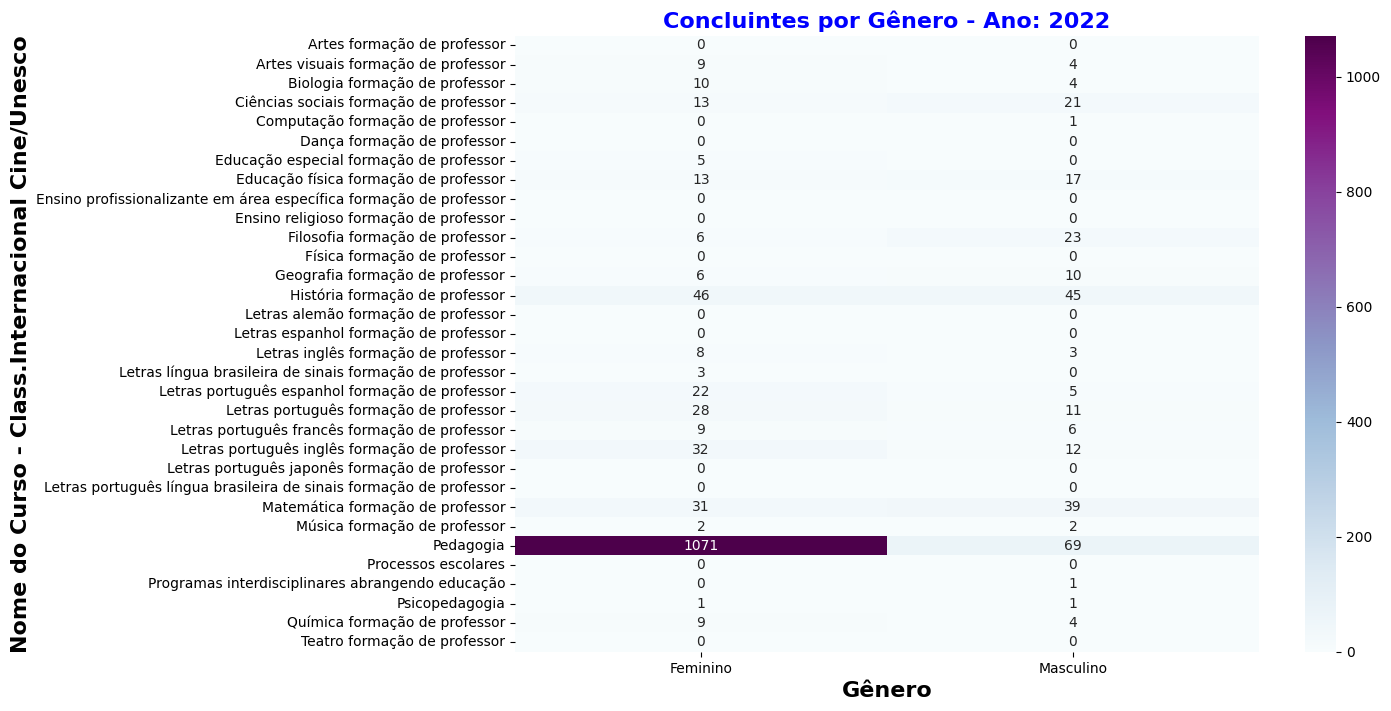

Concluintes por Faixa de Idade.



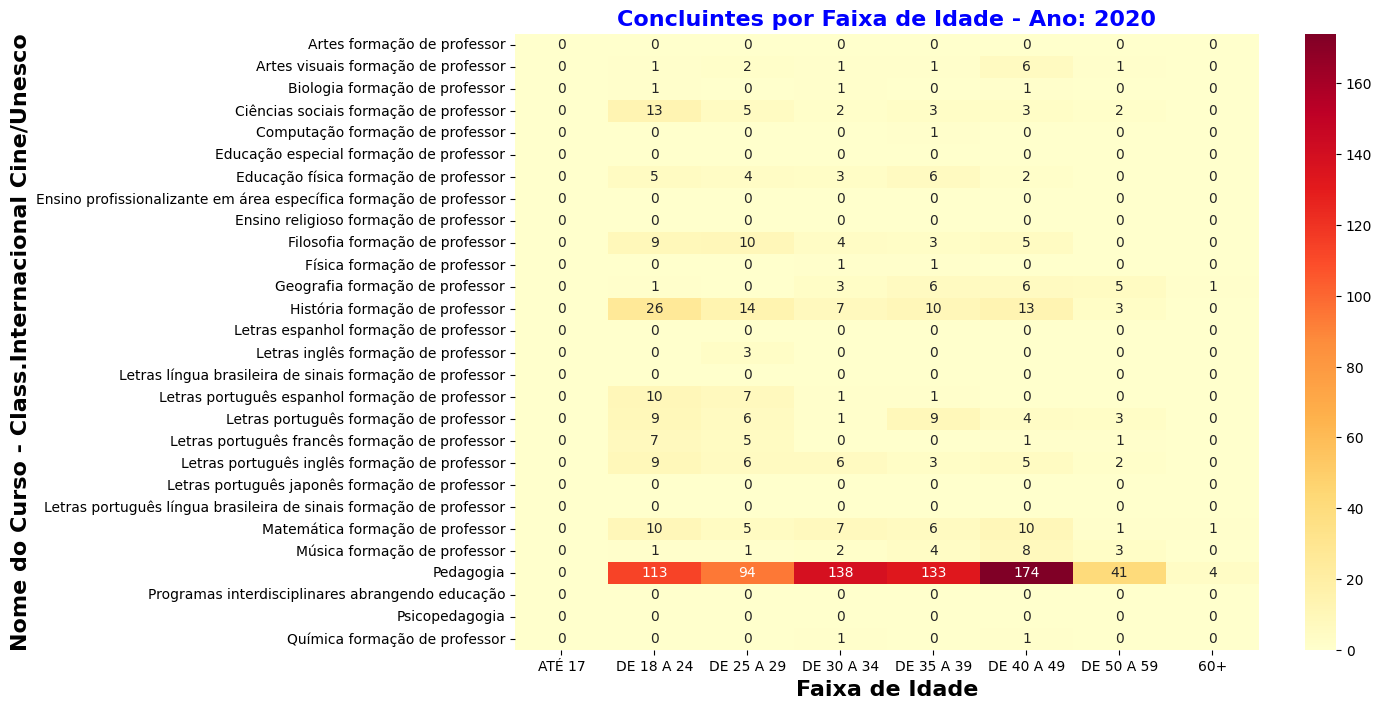

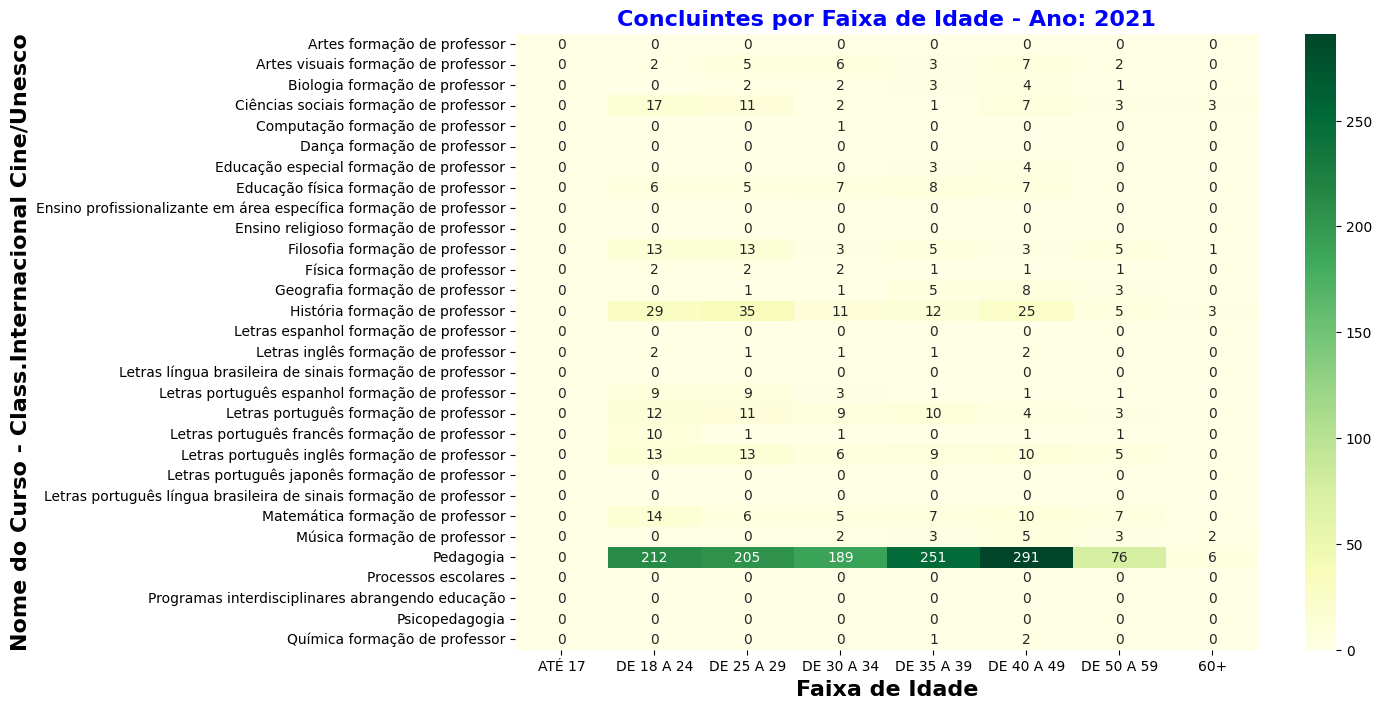

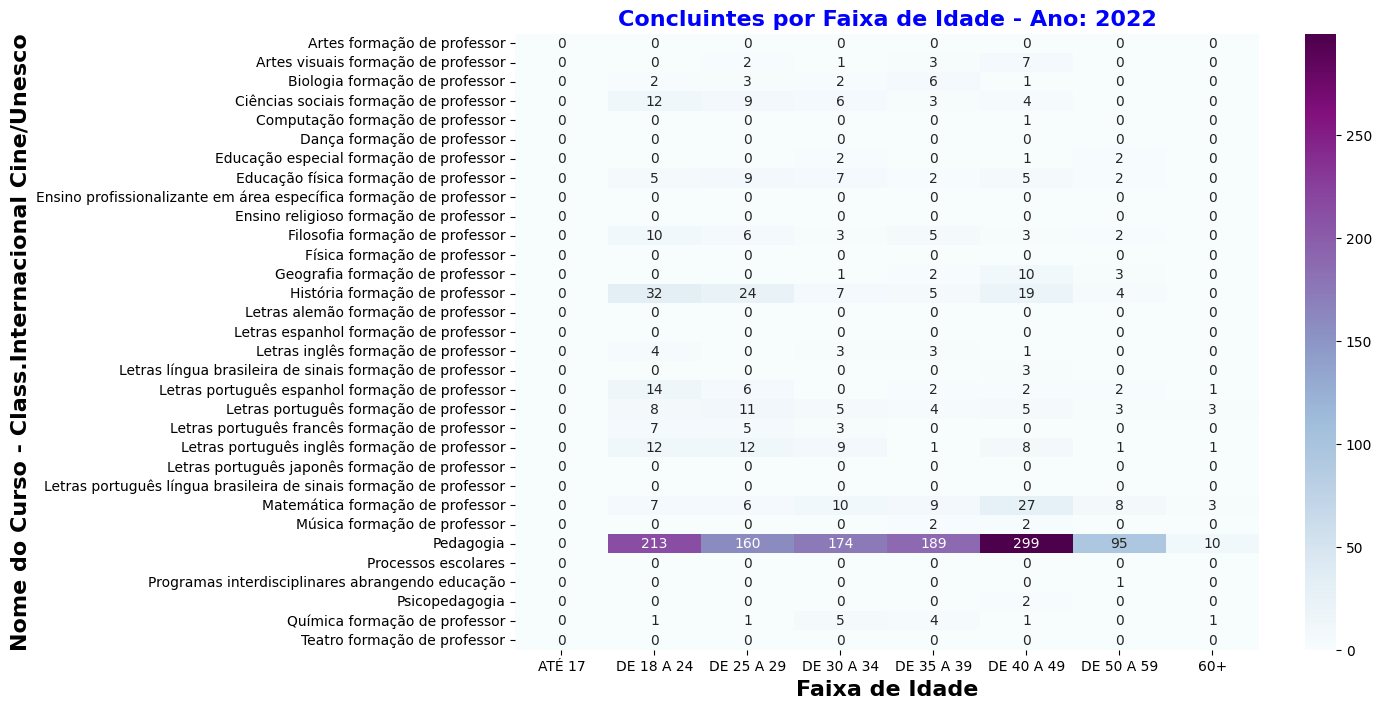

Concluintes por Raça/Cor.



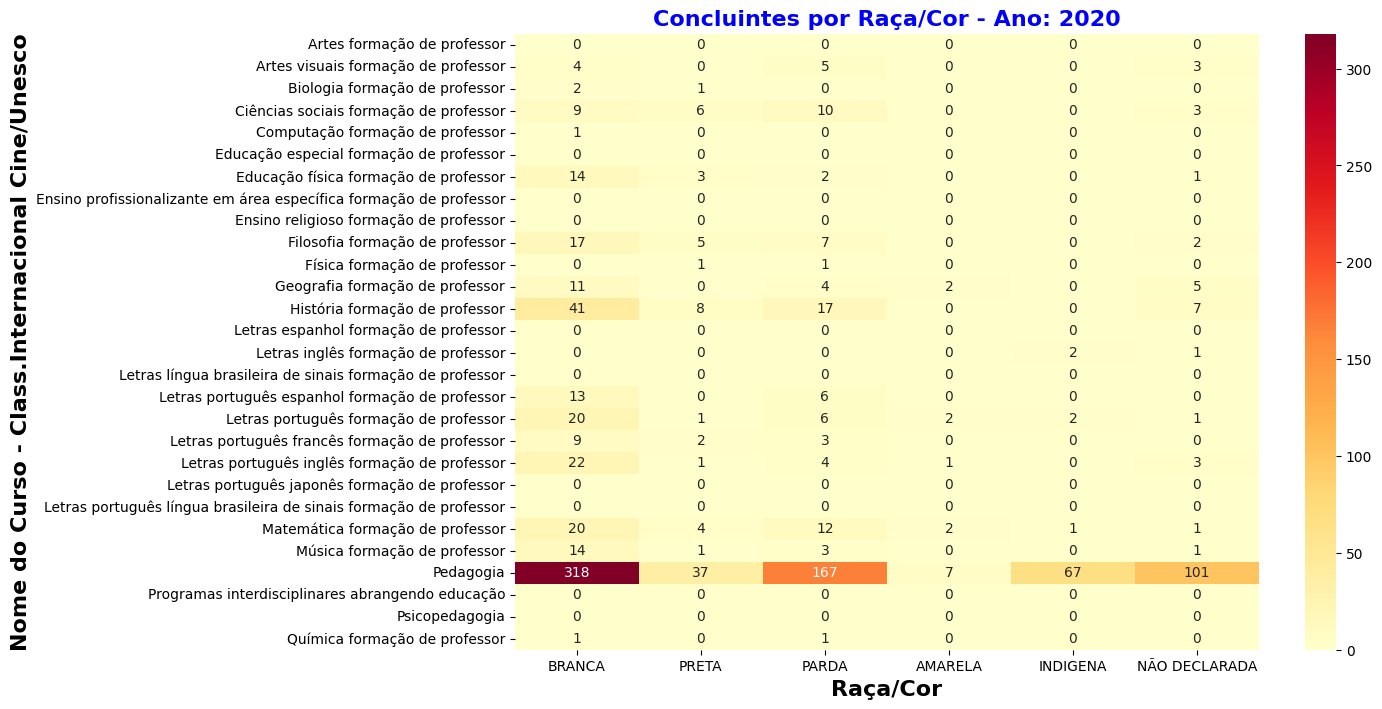

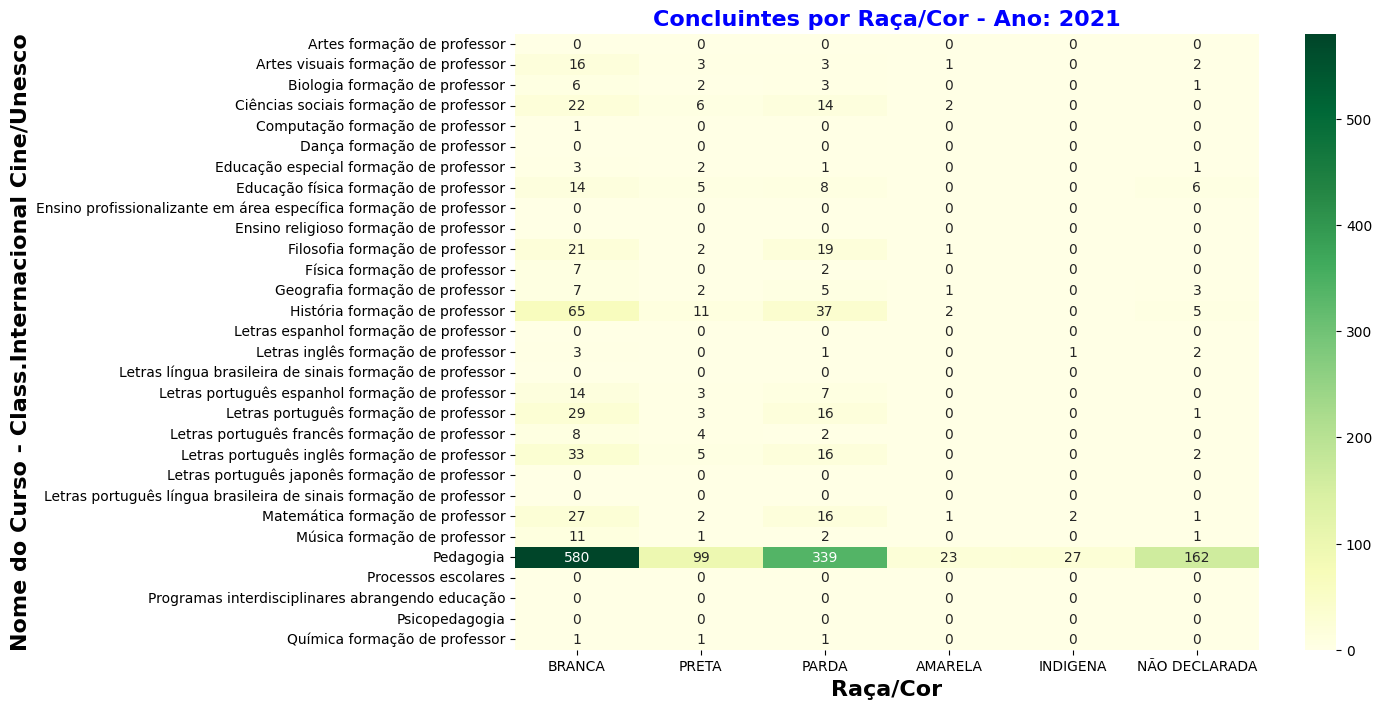

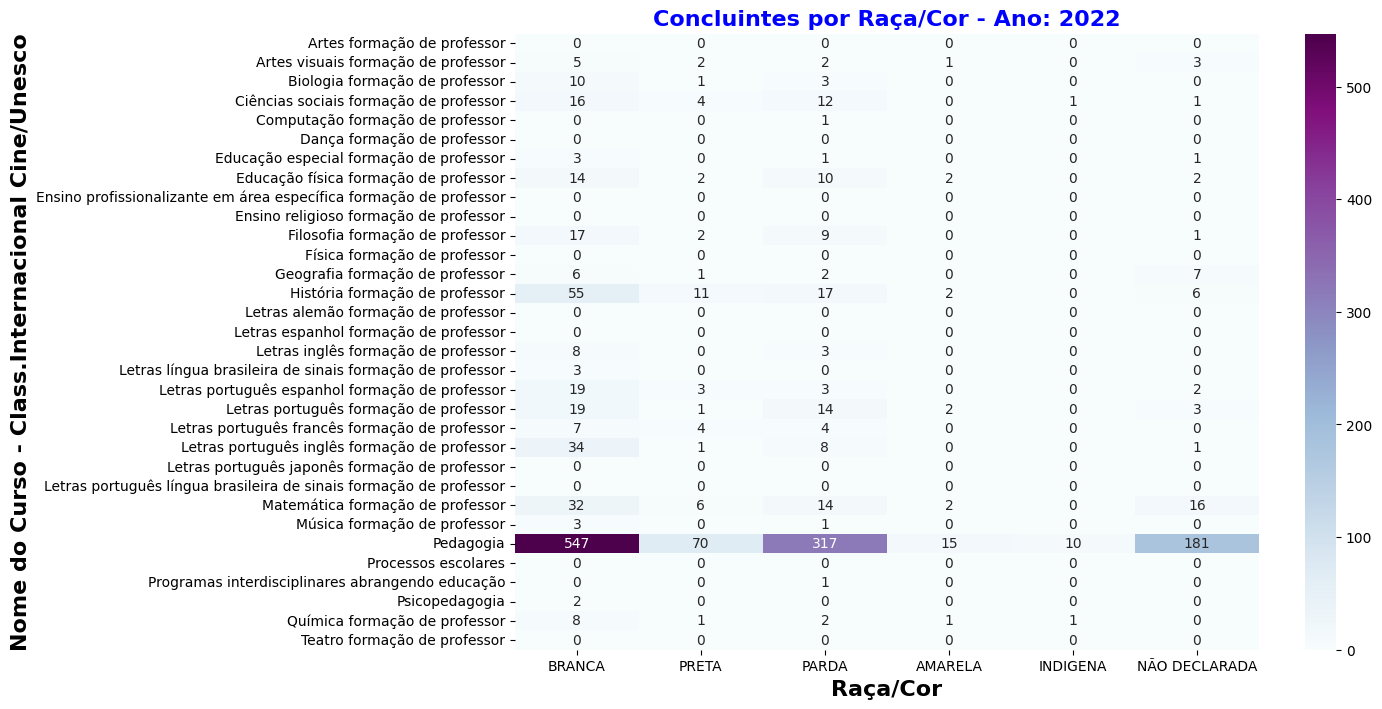

Concluintes por Nacionalidade.



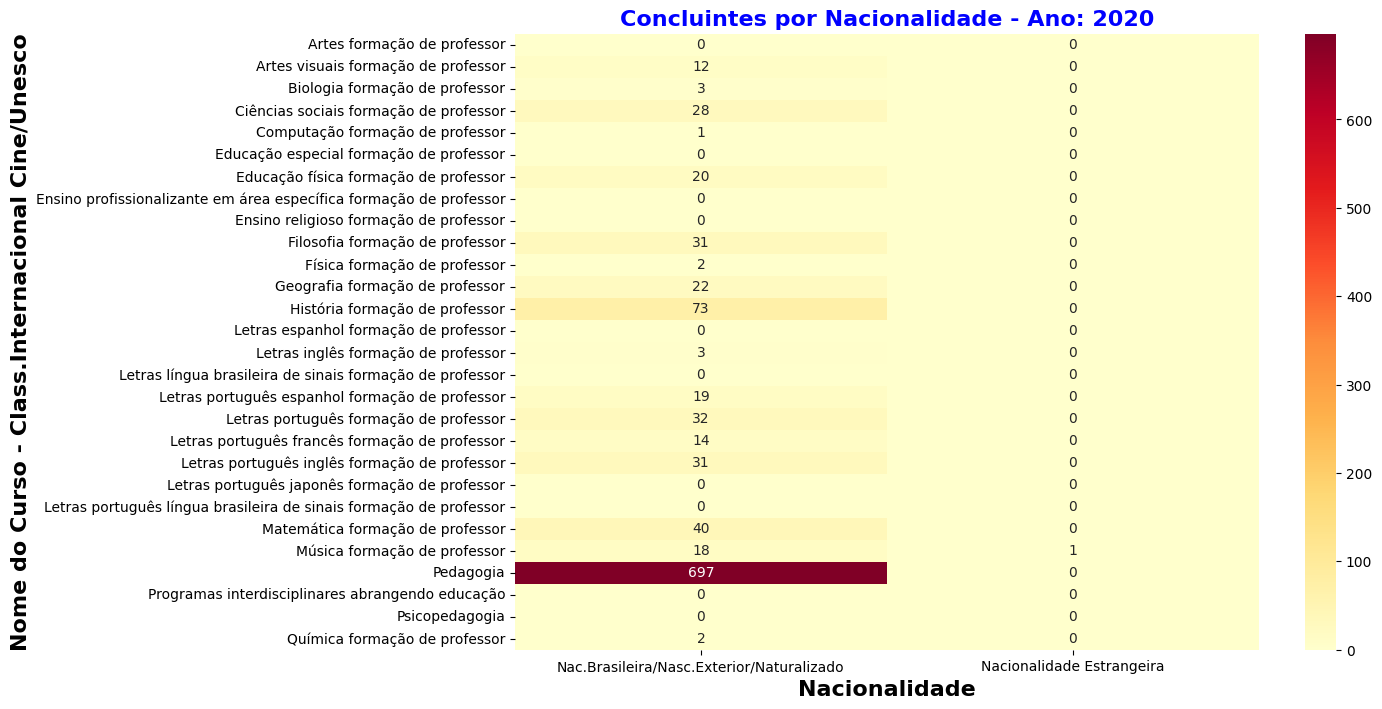

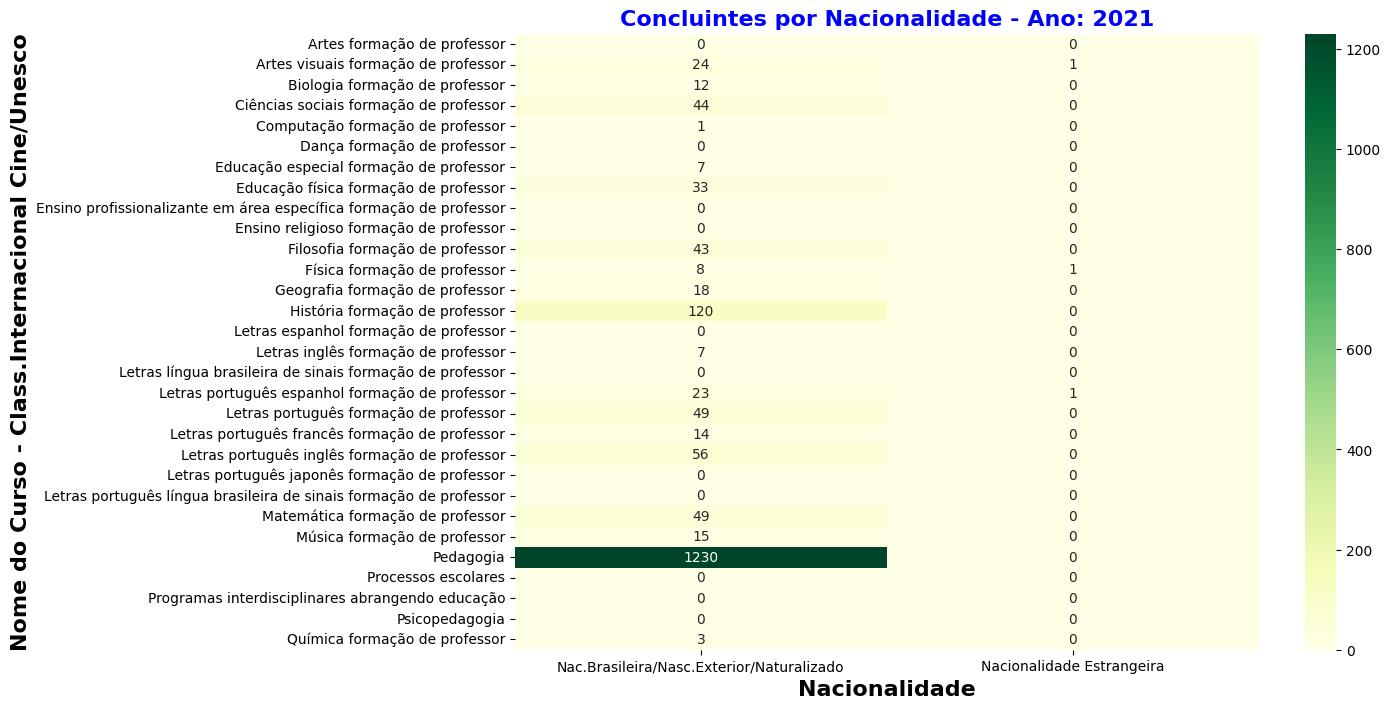

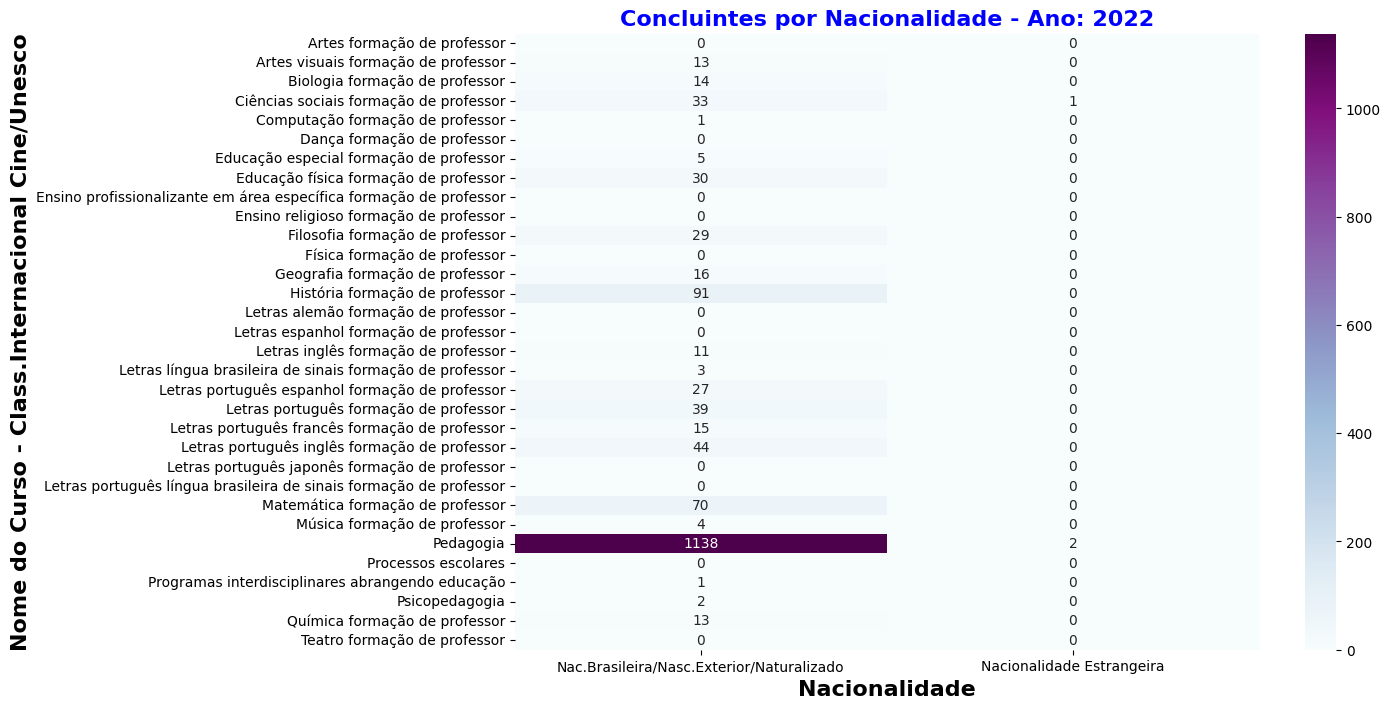

Concluintes por Financiamento.



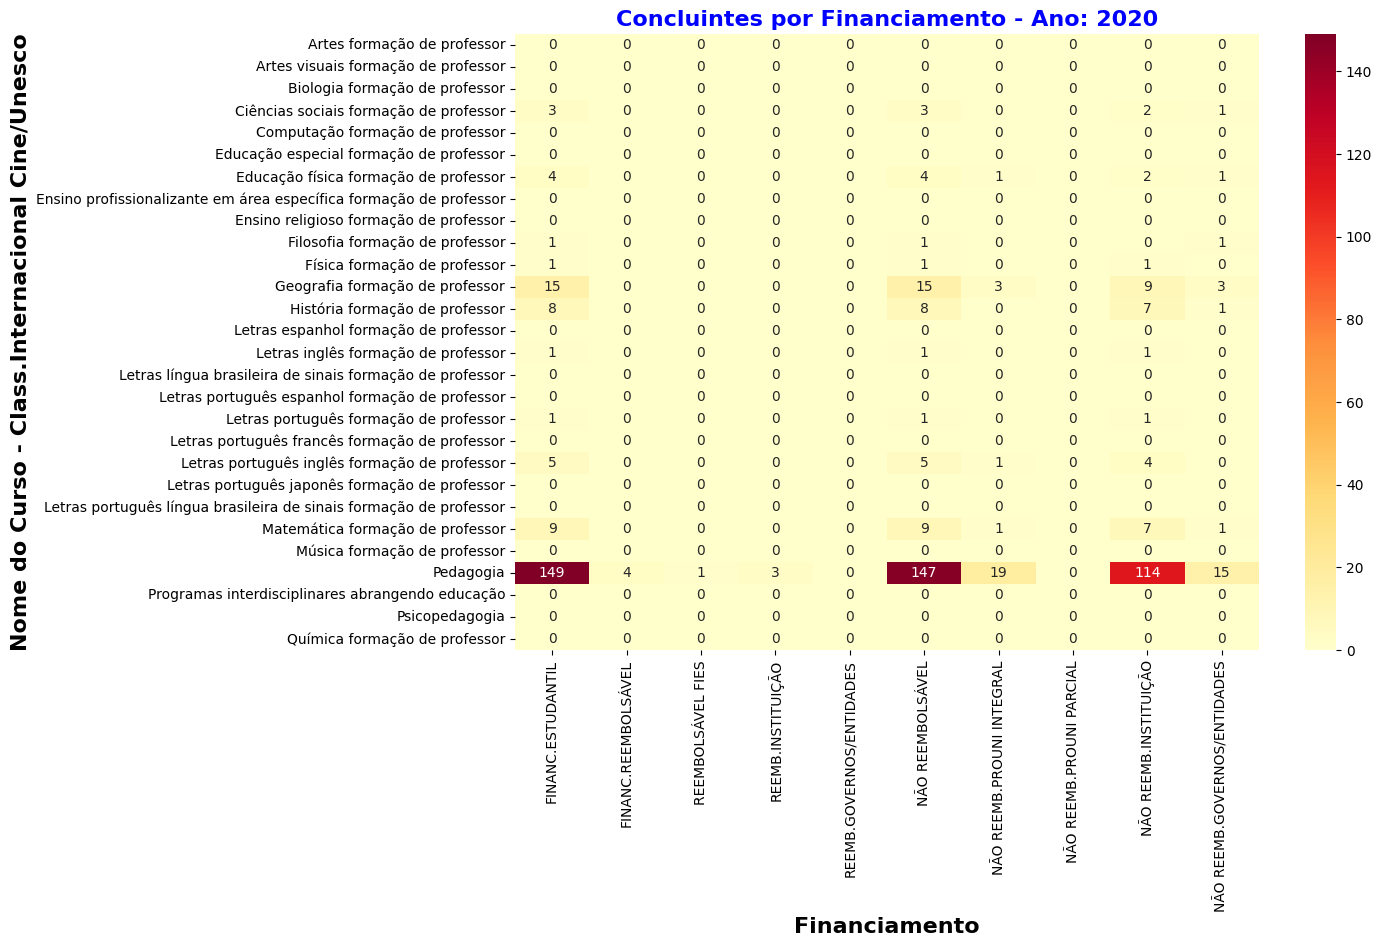

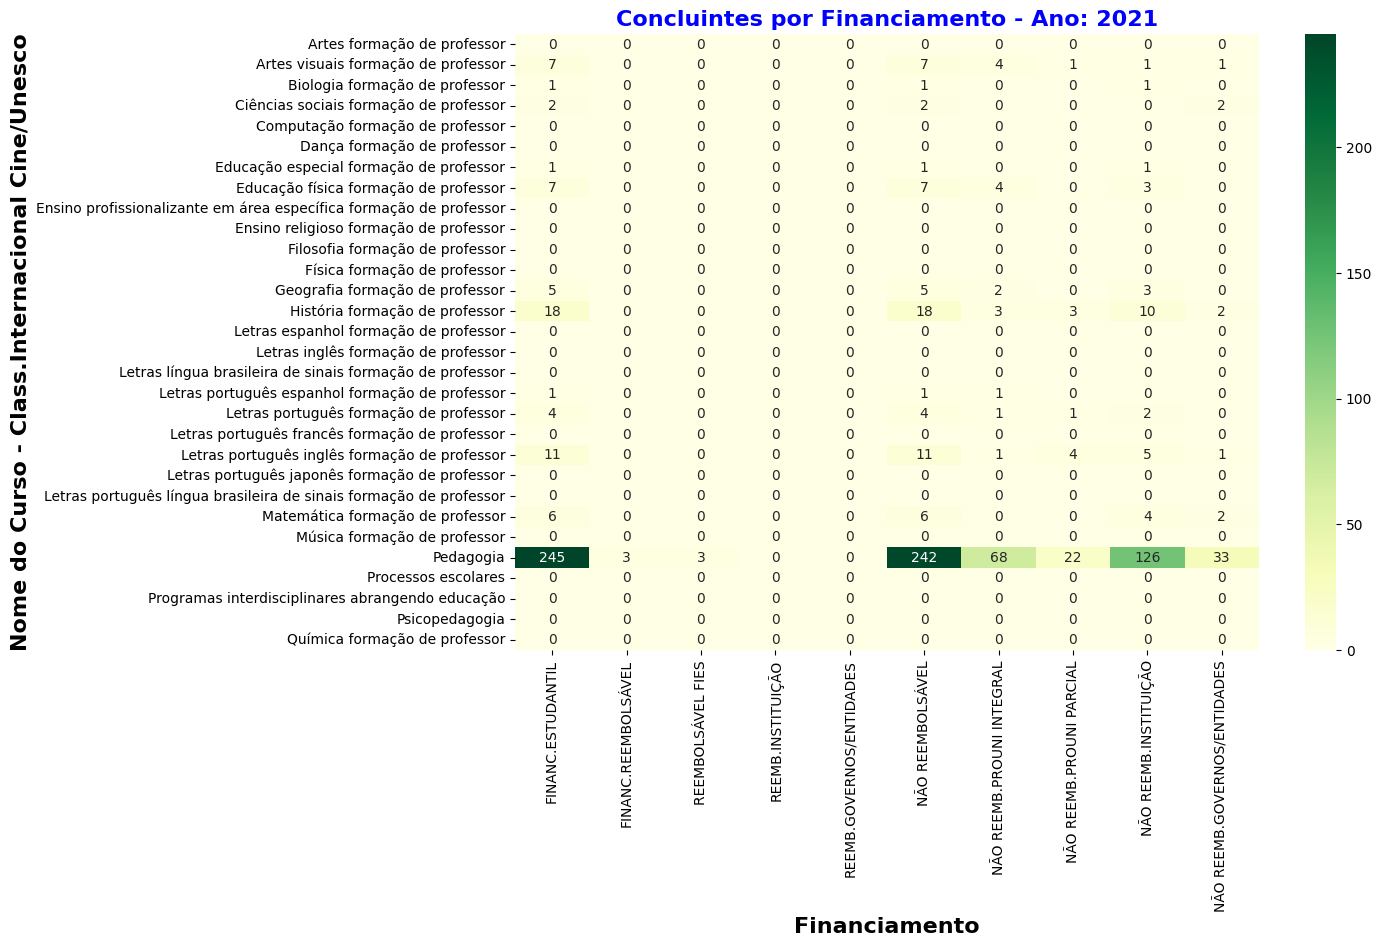

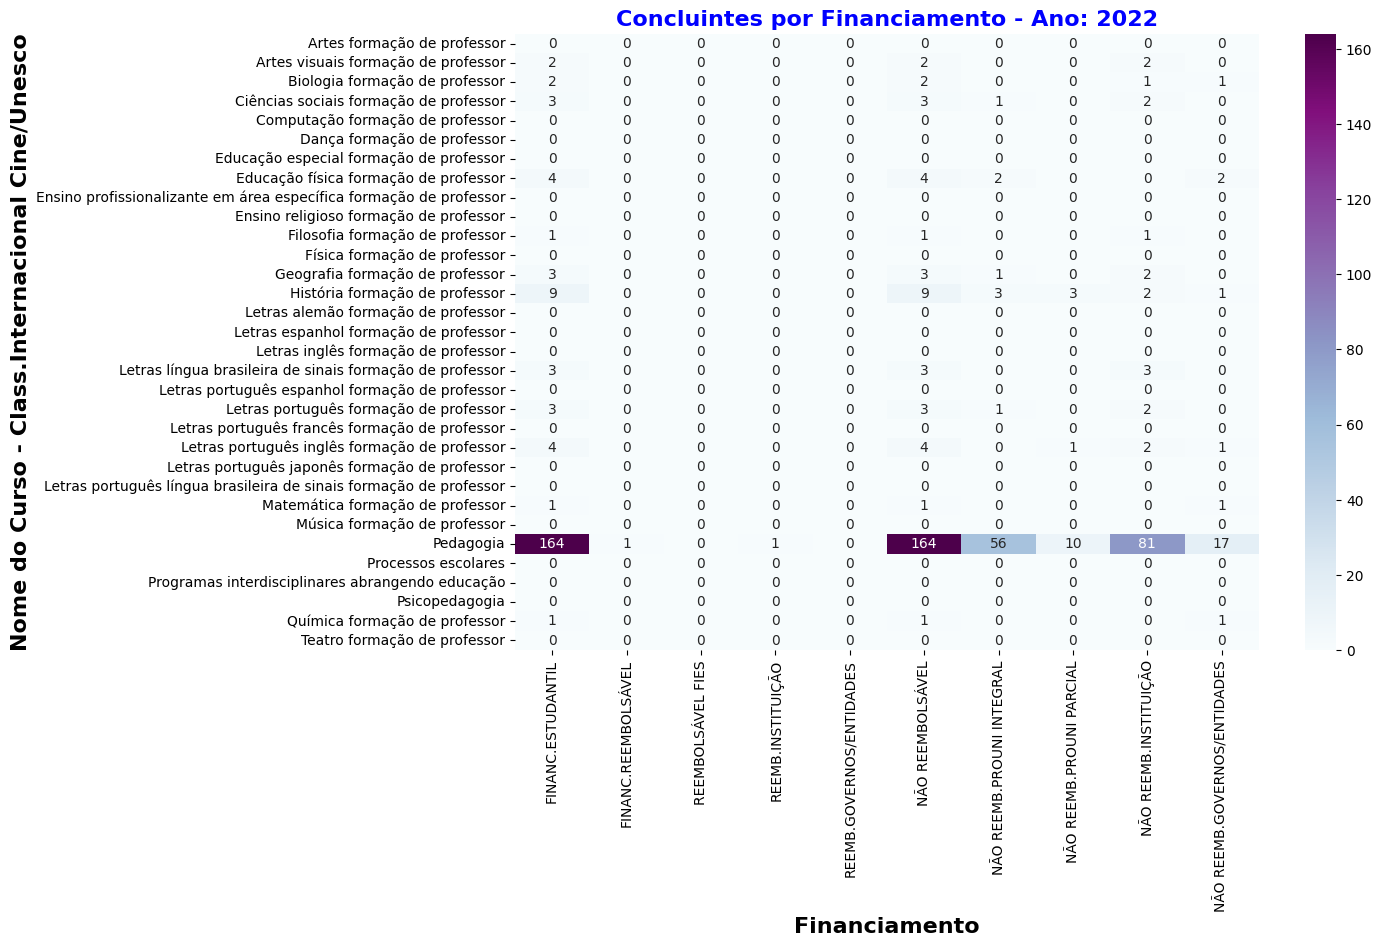

Concluintes por Reserva de Vagas.



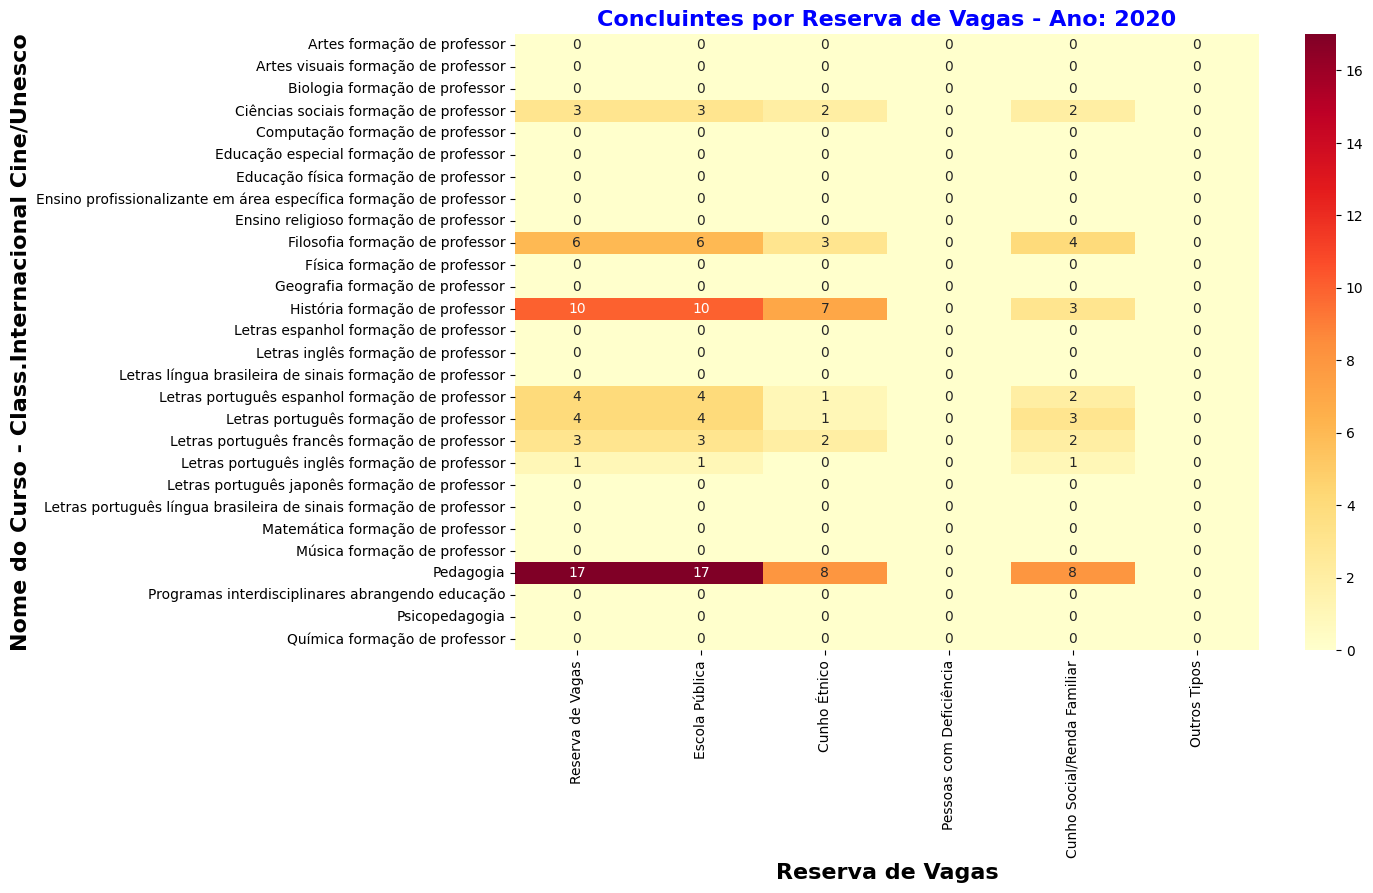

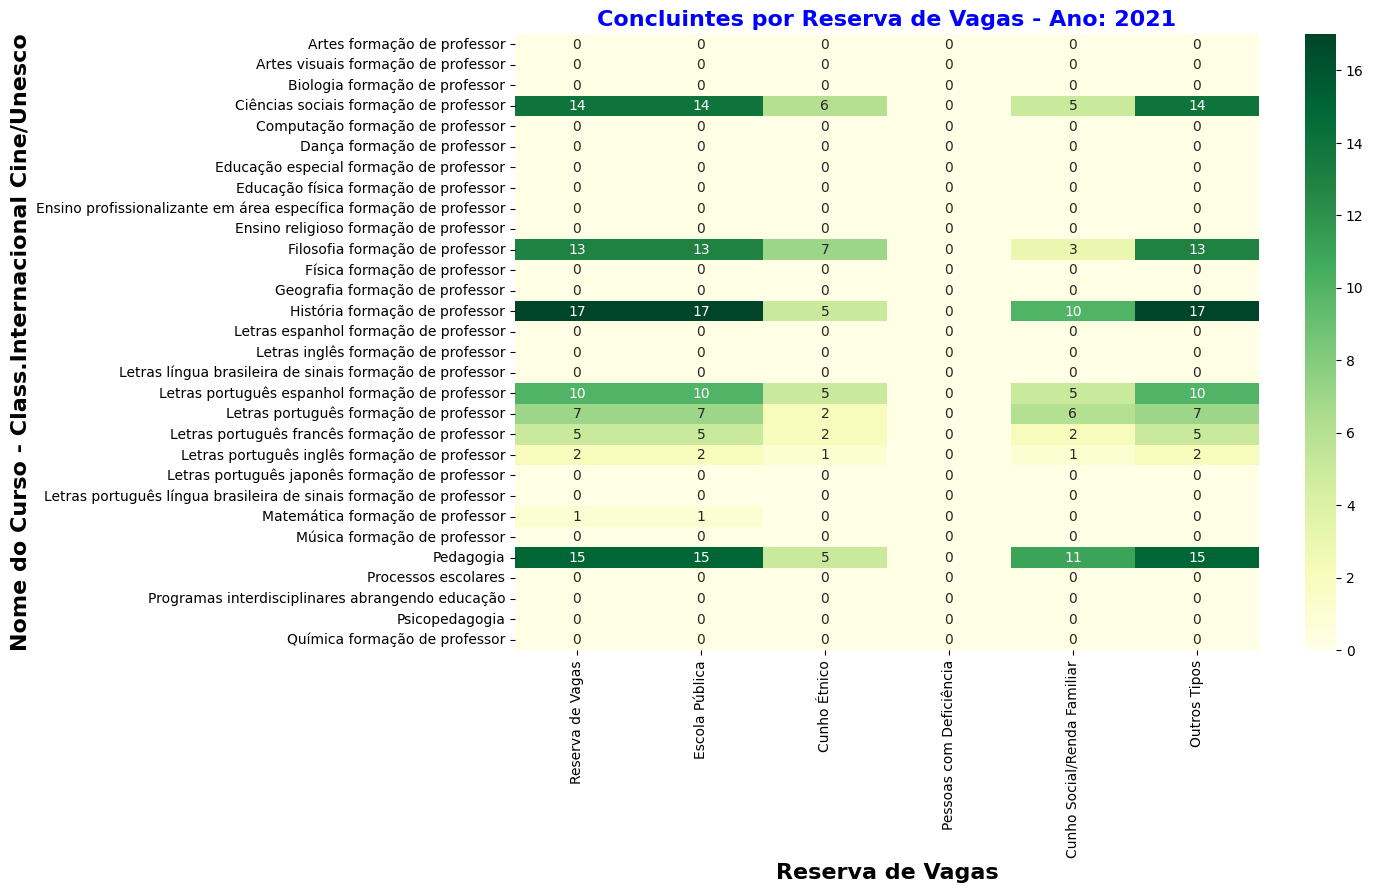

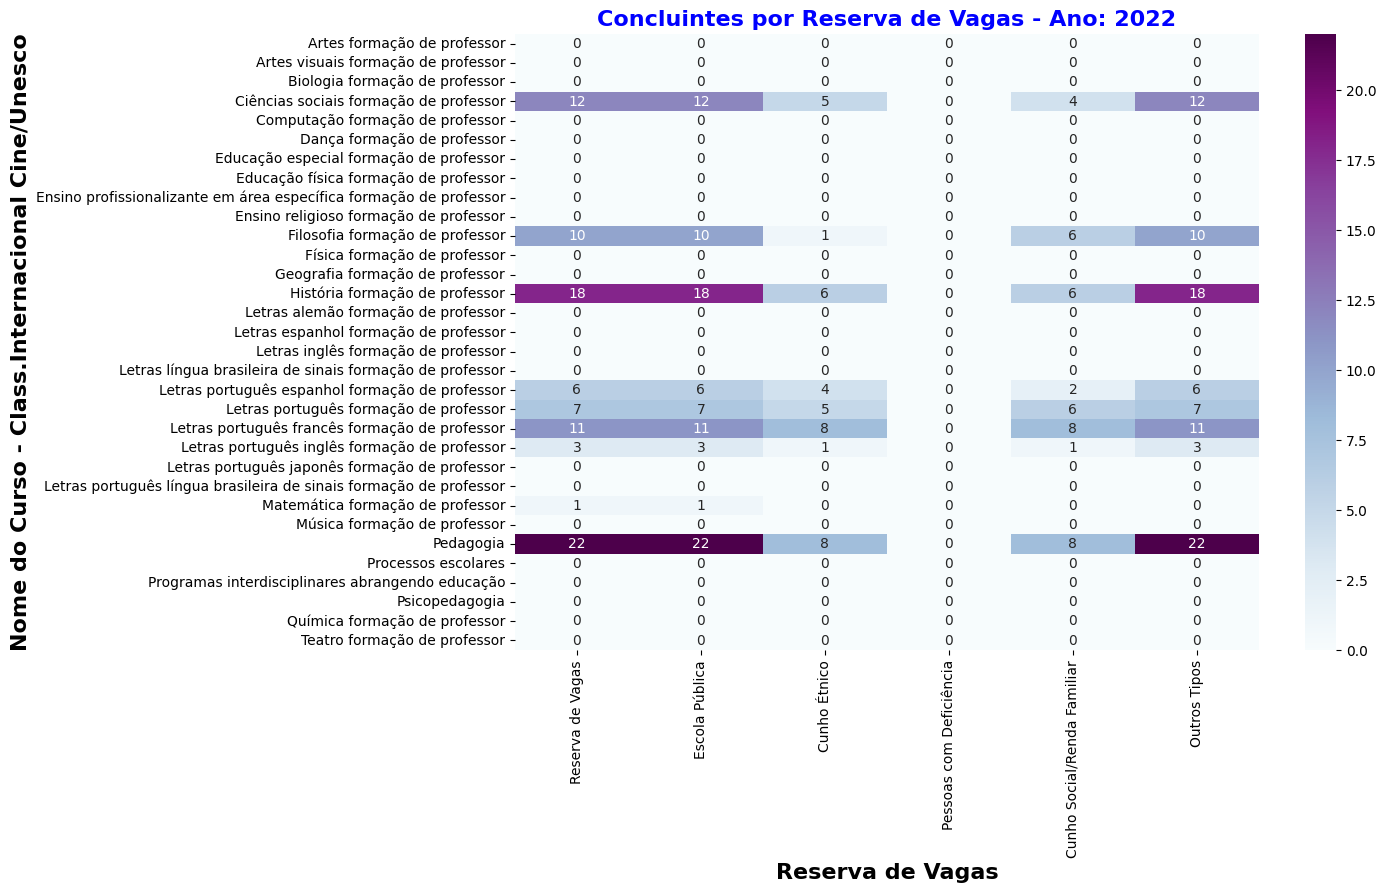

Concluintes por Término do Ensino Médio.



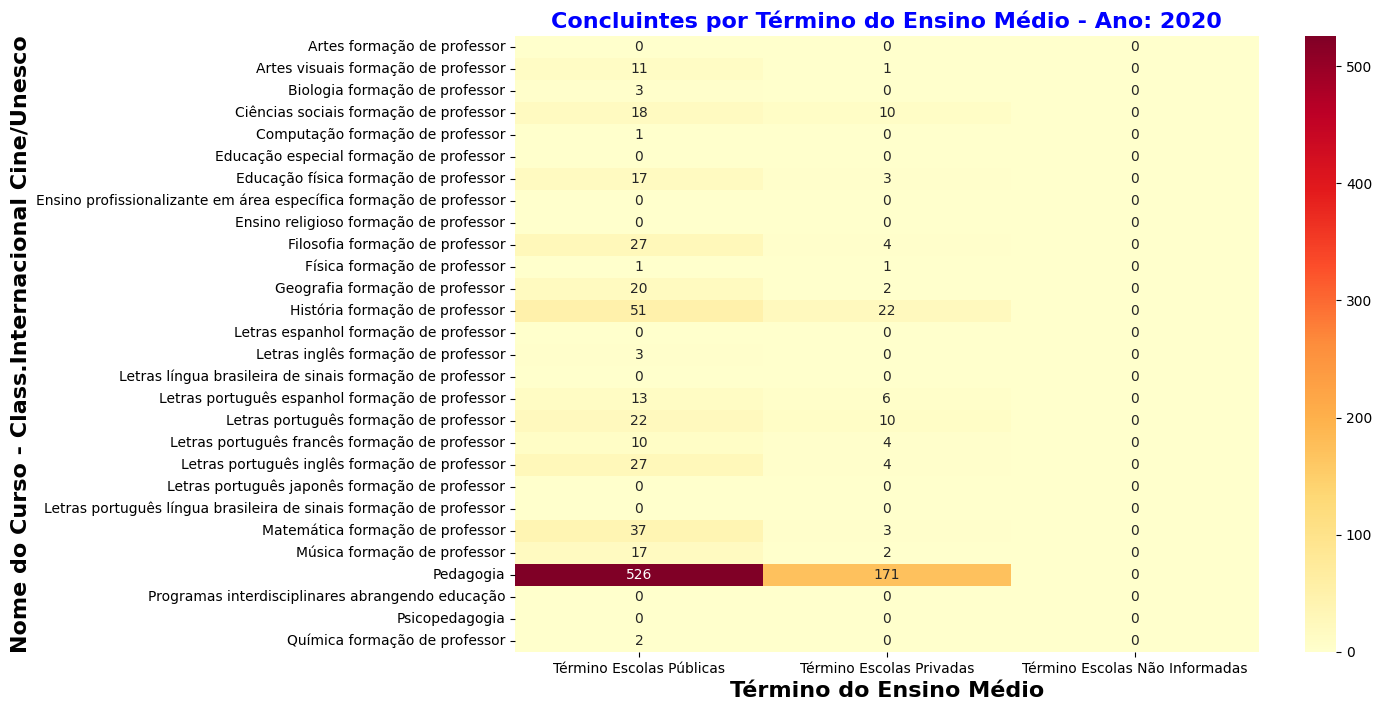

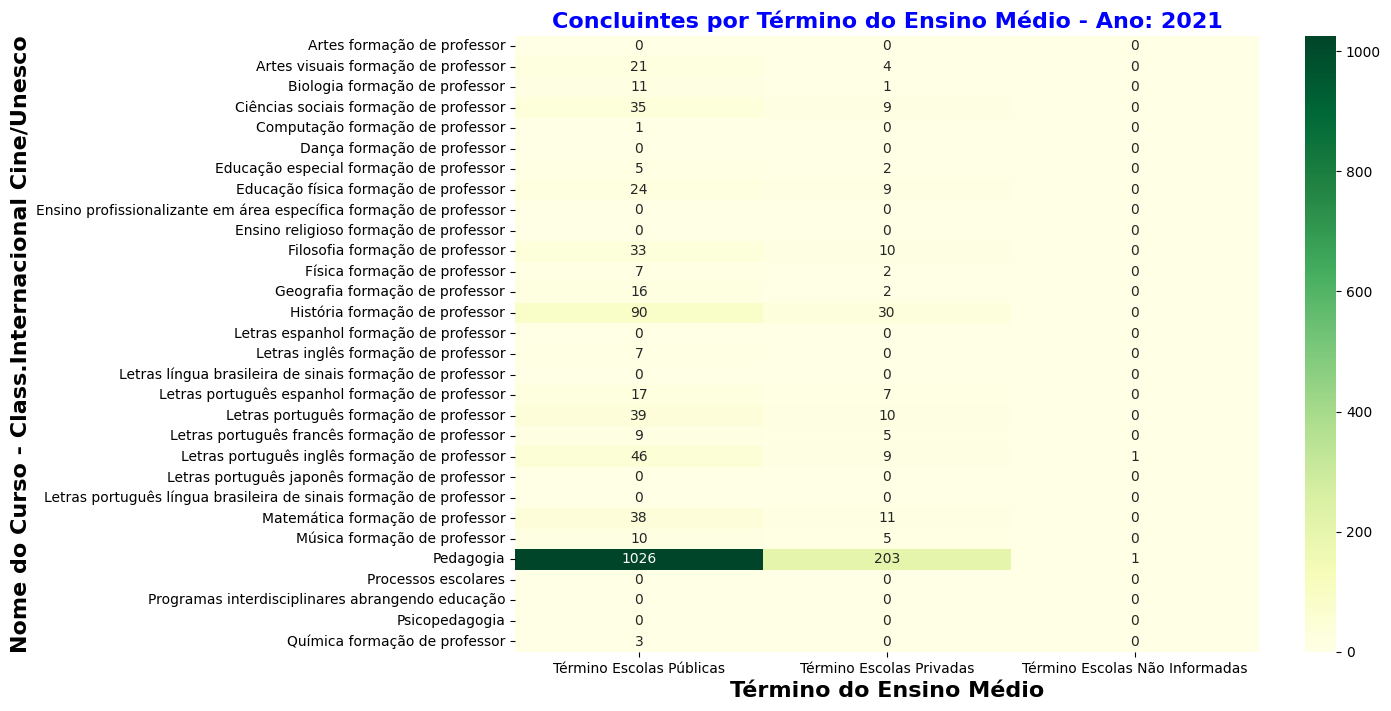

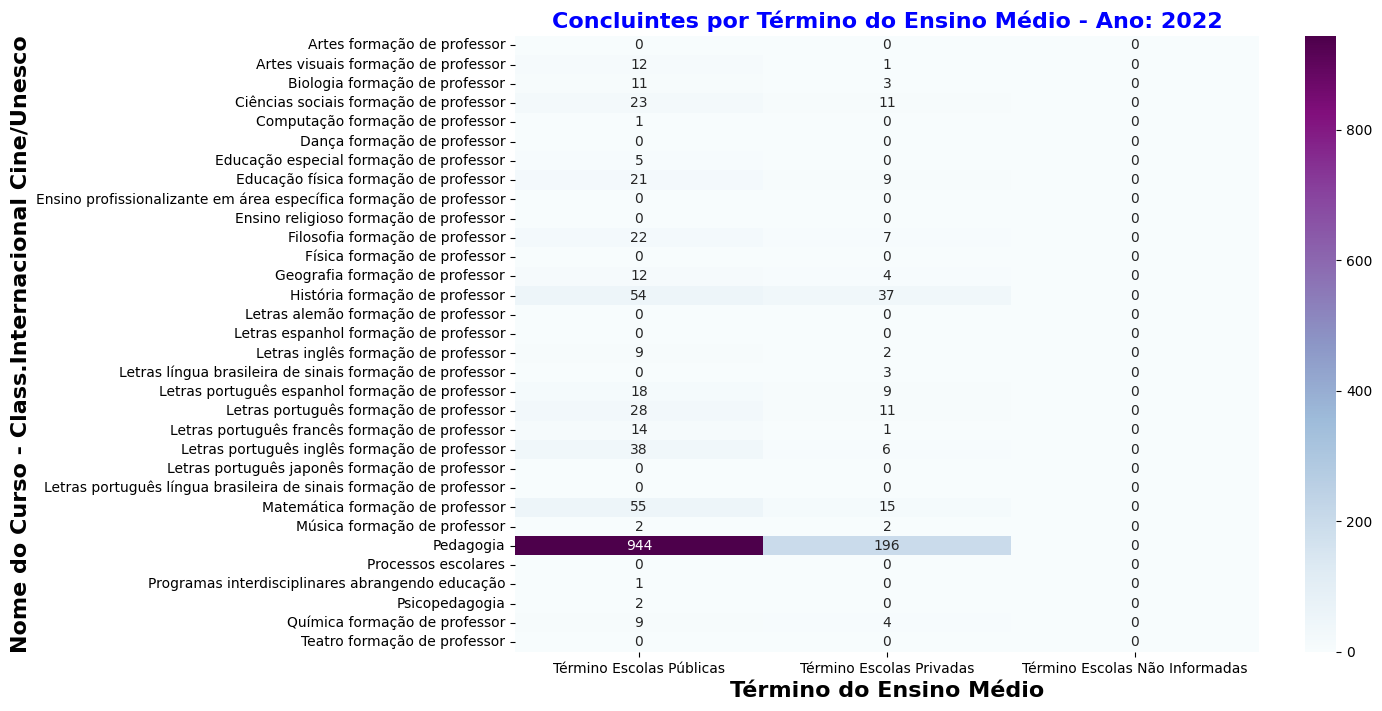

In [7]:
colunasParaAgrupamento=[
                    ['QT_CONC_FEM','QT_CONC_MASC'],
                    ['QT_CONC_0_17','QT_CONC_18_24','QT_CONC_25_29','QT_CONC_30_34','QT_CONC_35_39','QT_CONC_40_49','QT_CONC_50_59','QT_CONC_60_MAIS'],
                    ['QT_CONC_BRANCA','QT_CONC_PRETA','QT_CONC_PARDA','QT_CONC_AMARELA','QT_CONC_INDIGENA','QT_CONC_CORND'],
                    ['QT_CONC_NACBRAS','QT_CONC_NACESTRANG'],
                    ['QT_CONC_FINANC','QT_CONC_FINANC_REEMB','QT_CONC_FIES','QT_CONC_RPFIES','QT_CONC_FINANC_REEMB_OUTROS','QT_CONC_FINANC_NREEMB',
                        'QT_CONC_PROUNII','QT_CONC_PROUNIP','QT_CONC_NRPFIES','QT_CONC_FINANC_NREEMB_OUTROS'],
                    ['QT_CONC_RESERVA_VAGA','QT_CONC_RVREDEPUBLICA','QT_CONC_RVETNICO','QT_CONC_RVPDEF','QT_CONC_RVSOCIAL_RF','QT_CONC_RVOUTROS'],
                    ['QT_CONC_PROCESCPUBLICA','QT_CONC_PROCESCPRIVADA','QT_CONC_PROCNAOINFORMADA']
                ]
    
descricaoColunas=[
                    ['Feminino','Masculino'],
                    ['ATÉ 17','DE 18 A 24','DE 25 A 29','DE 30 A 34','DE 35 A 39','DE 40 A 49','DE 50 A 59','60+'],
                    ['BRANCA','PRETA','PARDA','AMARELA','INDIGENA','NÃO DECLARADA'],
                    ['Nac.Brasileira/Nasc.Exterior/Naturalizado','Nacionalidade Estrangeira'],
                    ['FINANC.ESTUDANTIL','FINANC.REEMBOLSÁVEL','REEMBOLSÁVEL FIES','REEMB.INSTITUIÇÃO','REEMB.GOVERNOS/ENTIDADES',
                         'NÃO REEMBOLSÁVEL','NÃO REEMB.PROUNI INTEGRAL','NÃO REEMB.PROUNI PARCIAL','NÃO REEMB.INSTITUIÇÃO',
                         'NÃO REEMB.GOVERNOS/ENTIDADES'],
                    ['Reserva de Vagas','Escola Pública','Cunho Étnico','Pessoas com Deficiência','Cunho Social/Renda Familiar','Outros Tipos'],
                    ['Término Escolas Públicas','Término Escolas Privadas','Término Escolas Não Informadas']
                ]

titulo=['Gênero', 'Faixa de Idade','Raça/Cor','Nacionalidade','Financiamento','Reserva de Vagas','Término do Ensino Médio']

print('\n')
print(f'Nome CINE Área Geral: {areaGeral}\n')

for pos, colunasAgrupadas in enumerate(colunasParaAgrupamento):
    print(f'Concluintes por {titulo[pos]}.\n')
   
    ces20=filtroDeDados(dataFrame=ces2020GRU, filtro=areaGeral, colunasAgrupadas=colunasAgrupadas, nomeColunas=descricaoColunas[pos])
    ces21=filtroDeDados(dataFrame=ces2021GRU, filtro=areaGeral, colunasAgrupadas=colunasAgrupadas, nomeColunas=descricaoColunas[pos])
    ces22=filtroDeDados(dataFrame=ces2022GRU, filtro=areaGeral, colunasAgrupadas=colunasAgrupadas, nomeColunas=descricaoColunas[pos])

    dataFrames=[ces20,ces21,ces22]
    anoBase=2020

    for dF in dataFrames:
        match anoBase:
            case 2020:
                cMap='YlOrRd'
            case 2021:
                cMap='YlGn'
            case 2022:
                cMap='BuPu'
            case _:
                cMap='binary'

        heatMapPlot(dataFrame=pd.DataFrame(dF), 
                    titulo=f'Concluintes por {titulo[pos]} - Ano: {anoBase}', 
                    xLabel=titulo[pos], yLabel='Nome do Curso - Class.Internacional Cine/Unesco',
                    cmap=cMap
                   )
       
        anoBase+=1
